In [1]:
import numpy as np
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float, curLine))
        dataMat.append(fltLine)
    return dataMat
    
dataMat = loadDataSet("testSet.txt")

print(dataMat)

[[1.658985, 4.285136], [-3.453687, 3.424321], [4.838138, -1.151539], [-5.379713, -3.362104], [0.972564, 2.924086], [-3.567919, 1.531611], [0.450614, -3.302219], [-3.487105, -1.724432], [2.668759, 1.594842], [-3.156485, 3.191137], [3.165506, -3.999838], [-2.786837, -3.099354], [4.208187, 2.984927], [-2.123337, 2.943366], [0.704199, -0.479481], [-0.39237, -3.963704], [2.831667, 1.574018], [-0.790153, 3.343144], [2.943496, -3.357075], [-3.195883, -2.283926], [2.336445, 2.875106], [-1.786345, 2.554248], [2.190101, -1.90602], [-3.403367, -2.778288], [1.778124, 3.880832], [-1.688346, 2.230267], [2.592976, -2.054368], [-4.007257, -3.207066], [2.257734, 3.387564], [-2.679011, 0.785119], [0.939512, -4.023563], [-3.674424, -2.261084], [2.046259, 2.735279], [-3.18947, 1.780269], [4.372646, -0.822248], [-2.579316, -3.497576], [1.889034, 5.1904], [-0.798747, 2.185588], [2.83652, -2.658556], [-3.837877, -3.253815], [2.096701, 3.886007], [-2.709034, 2.923887], [3.367037, -3.184789], [-2.121479, -4.23

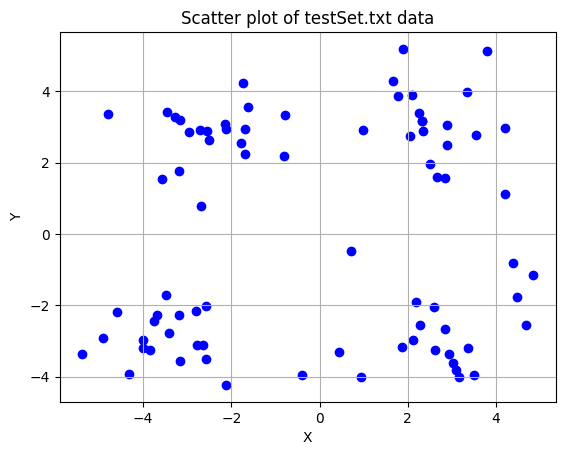

In [3]:
import matplotlib.pyplot as plt
def plot(data, centroids = None):
    data = np.array(data)
    x = data[:, 0].flatten().tolist()
    y = data[:, 1].flatten().tolist()
    plt.scatter(x, y, c='blue', marker='o')
    
    if centroids is not None:
        centroids = np.array(centroids)
        cx = centroids[:, 0].flatten().tolist()
        cy = centroids[:, 1].flatten().tolist()
        plt.scatter(cx, cy, c='red', marker='D', s=100, label='Centroïdes')
        
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter plot of testSet.txt data')
    plt.grid(True)
    plt.show()
plot(dataMat)

In [5]:
def distEclud(vecA, vecB):
    return np.sqrt(sum(np.power(vecA - vecB, 2)))
print(dataMat[0], dataMat[1])
print(distEclud(np.array(dataMat[0]), np.array(dataMat[1])))

[1.658985, 4.285136] [-3.453687, 3.424321]
5.184632816681332


In [7]:
def randCent(dataSet, k):
    n = dataSet.shape[1] #number columns
    centroids = np.array(np.zeros((k,n)))
    for j in range(n):
        minJ = min(dataSet[:,j])
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = minJ + rangeJ * np.random.rand(k)
    return centroids
centroids = randCent(np.array(dataMat), 4)
print(centroids)

[[-1.94524108  2.51517153]
 [-4.49527717  4.50823302]
 [-0.52935655 -1.52586471]
 [ 1.95217199 -3.63724386]]


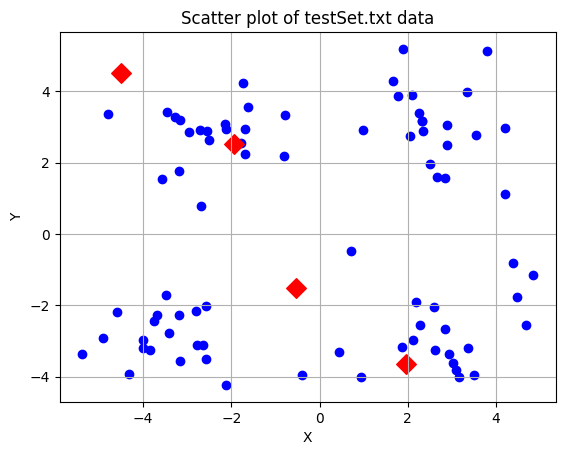

In [8]:
plot(dataMat, centroids)

In [17]:
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):
    m = dataSet.shape[0]#num points
    clusterAssment = np.array(np.zeros((m,2))) #colonne 0 : cluster colonne 1 : distance
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = np.inf; minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        #print(centroids)
        for cent in range(k):
            ptsInClust = dataSet[clusterAssment[:,0]==cent] # nonzero return indice condition vrai 
            centroids[cent,:] = np.mean(ptsInClust, axis=0)
    return centroids, clusterAssment

centroids, clusterAssment = kMeans(np.array(dataMat), 4)
print(centroids)
print(clusterAssment[:4])

[[ 2.6265299   3.10868015]
 [-3.38237045 -2.9473363 ]
 [ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]]
[[0.         2.3201915 ]
 [3.         1.39004893]
 [2.         6.63839104]
 [1.         4.16140951]]


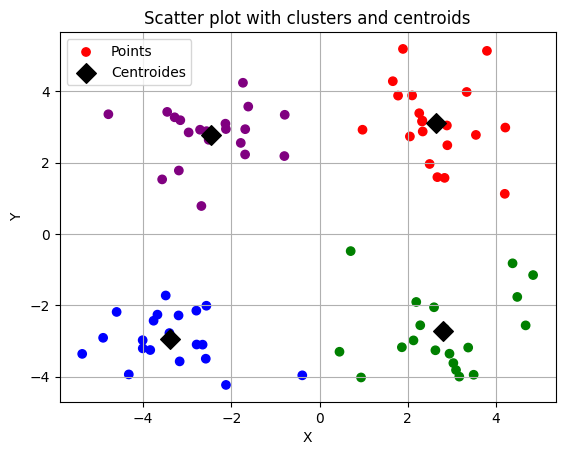

In [18]:
def plot_cluster(data, clusterAssment, centroids):
    data = np.array(data)
    x = data[:, 0].flatten().tolist()
    y = data[:, 1].flatten().tolist()

    # Dictionnaire de couleurs pour les clusters (jusqu'à 10 clusters ici)
    colors = {
    0: "red",
    1: "blue",
    2: "green",
    3: "purple",4: "yellow",5: "cyan",6: "orange",7: "magenta",8: "brown",9: "pink"}

    # Si clusterAssment est fourni, colorie les points selon leur cluster
    cluster_ids = clusterAssment[:, 0].flatten().astype(int).tolist()
    colors_points = [colors[cid] for cid in cluster_ids]
    plt.scatter(x, y, c=colors_points, marker='o', label='Points')

    centroids = np.array(centroids)
    cx = centroids[:, 0].flatten().tolist()
    cy = centroids[:, 1].flatten().tolist()
    plt.scatter(cx, cy, c='black', marker='D', s=100, label='Centroides')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Scatter plot with clusters and centroids')
    plt.legend()
    plt.grid(True)
    plt.show()
plot_cluster(dataMat, clusterAssment, centroids)

[[ 2.6265299   3.10868015]
 [-3.38237045 -2.9473363 ]
 [ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]]
[[0.         2.3201915 ]
 [3.         1.39004893]
 [2.         6.63839104]
 [1.         4.16140951]]


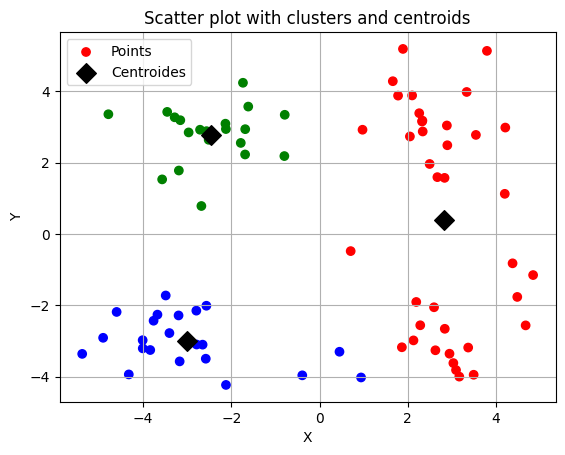

In [19]:
centroids_2, clusterAssment_2 = kMeans(np.array(dataMat), 3)
print(centroids)
print(clusterAssment[:4])
plot_cluster(dataMat, clusterAssment_2, centroids_2)

[[ 2.6265299   3.10868015]
 [-3.38237045 -2.9473363 ]
 [ 2.80293085 -2.7315146 ]
 [-2.46154315  2.78737555]]
[[0.         2.3201915 ]
 [3.         1.39004893]
 [2.         6.63839104]
 [1.         4.16140951]]


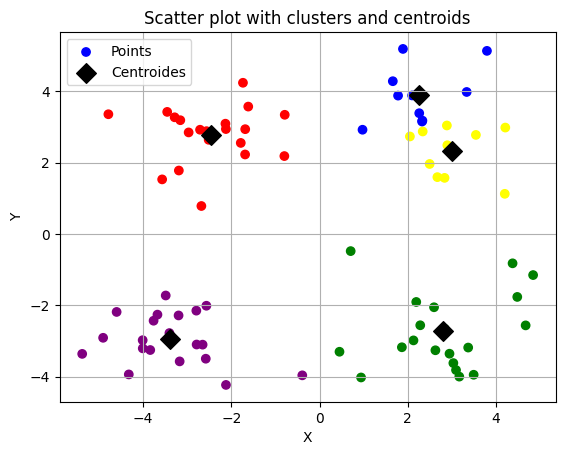

In [20]:
centroids_3, clusterAssment_3 = kMeans(np.array(dataMat), 5)
print(centroids)
print(clusterAssment[:4])
plot_cluster(dataMat, clusterAssment_3, centroids_3)

In [23]:
def biKmeans(dataSet, k, distMeas=distEclud):
    m = dataSet.shape[0]
    clusterAssment = np.zeros((m, 2))  # colonne 0 : cluster, colonne 1 : distance au centroïde
    centroid0 = np.mean(dataSet, axis=0)
    centList = [centroid0]

    for j in range(m):
        clusterAssment[j, 1] = distMeas(centroid0, dataSet[j, :]) ** 2

    while len(centList) < k:
        lowestSSE = np.inf
        bestCentToSplit = -1

        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[clusterAssment[:, 0] == i]
            if len(ptsInCurrCluster) <= 1:
                continue  # éviter de splitter un cluster de 1 seul point

            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2, distMeas)

            sseSplit = np.sum(splitClustAss[:, 1])
            sseNotSplit = np.sum(clusterAssment[clusterAssment[:, 0] != i][:, 1])
            totalSSE = sseSplit + sseNotSplit

            if totalSSE < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = totalSSE

        # Réaffecter les clusters (0 reste, 1 devient un nouveau numéro)
        bestClustAss[bestClustAss[:, 0] == 1, 0] = len(centList)
        bestClustAss[bestClustAss[:, 0] == 0, 0] = bestCentToSplit

        # Mettre à jour les centroïdes
        centList[bestCentToSplit] = bestNewCents[0]
        centList.append(bestNewCents[1])

        # Mettre à jour les assignations globales
        clusterAssment[clusterAssment[:, 0] == bestCentToSplit] = bestClustAss

    return np.array(centList), clusterAssment

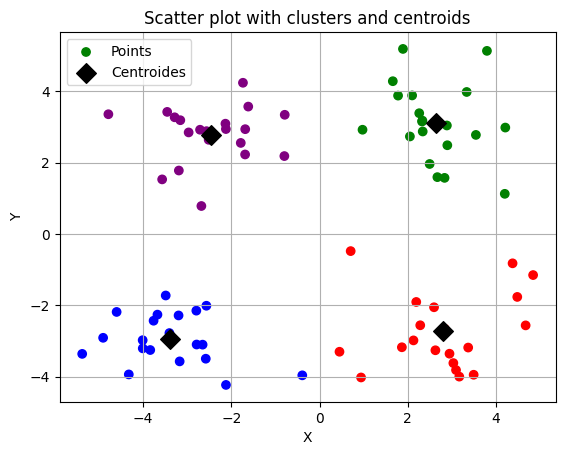

In [24]:
centroids_bi, clusterAssment_bi = biKmeans(np.array(dataMat), 4)
plot_cluster(dataMat, clusterAssment_bi, centroids_bi)

In [25]:
SSE = []
for i in range (0, 9):
    centroids_bi, clusterAssment_bi = biKmeans(np.array(dataMat), i)
    SSE.append(sum(clusterAssment_bi[:, 1]))
print(SSE)

[np.float64(1465.5800234838166), np.float64(1465.5800234838166), np.float64(828.6926539968682), np.float64(443.25428885723744), np.float64(149.95430467642637), np.float64(166.9617244569558), np.float64(138.5522597201595), np.float64(100.63605640212334), np.float64(79.70761684310014)]


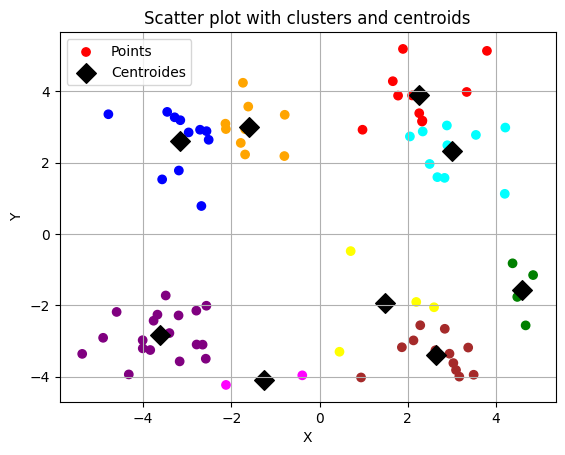

In [26]:
centroids_bi_9, clusterAssment_bi_9 = biKmeans(np.array(dataMat), 9)
plot_cluster(dataMat, clusterAssment_bi_9, centroids_bi_9)

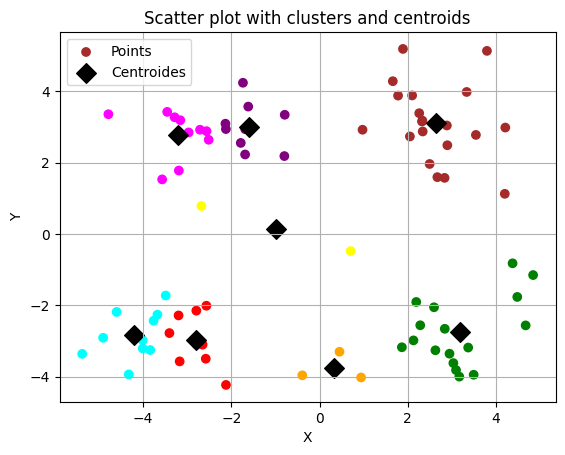

In [27]:
centroids_9, clusterAssment_9 = kMeans(np.array(dataMat), 9)
plot_cluster(dataMat, clusterAssment_9, centroids_9)